## Import Libraries

In [1]:
import pandas as pd
pd.options.display.float_format = "{:,.3f}".format
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 100)

import matplotlib.pyplot as plt
import pandas_datareader as wb
import datetime as dt
import numpy as np

## Set Parameters

In [2]:
ticker = 'SPY'
start = '2000-01-01'
end = None

# moving average params
fast_ema = 20
slow_ema = 40
sign_ema = 3
band = 0.03

## Retrieve Data & Compute Moving Averages

In [3]:
# fetch daily data
daily = wb.DataReader(ticker, 'yahoo', start, end)[['Open','High','Low','Close']]

# calculate fast and slow ema
daily[f'EMA_{fast_ema}'] = daily['Close'].ewm(span=fast_ema).mean()
daily[f'EMA_{slow_ema}'] = daily['Close'].ewm(span=slow_ema).mean()
daily['EMA_Diff'] = daily[f'EMA_{fast_ema}'] - daily[f'EMA_{slow_ema}']
daily['EMA_Cross'] = daily['EMA_Diff'] - daily['EMA_Diff'].ewm(span=sign_ema).mean()
daily['Cross_Chg'] = daily['EMA_Cross'].diff()

# calculate ema trend
daily['EMA_Signal'] = daily['EMA_Cross'].apply(lambda x: 1 if x >= band else 0 if x <= -band else np.nan)
daily['EMA_Signal'].fillna(method='pad', inplace=True)

In [4]:
daily.iloc[-15:,-6:]

,EMA_20,EMA_40,EMA_Diff,EMA_Cross,Cross_Chg,EMA_Signal
Date,,,,,,
2021-08-27,443.782,439.230,4.551,0.060,0.056,1.000
2021-08-30,444.586,439.864,4.722,0.115,0.055,1.000
2021-08-31,445.250,440.435,4.815,0.104,-0.011,1.000
2021-09-01,445.874,440.989,4.885,0.087,-0.018,1.000
2021-09-02,446.571,441.584,4.986,0.094,0.007,1.000
2021-09-03,447.191,442.145,5.046,0.077,-0.018,1.000
2021-09-07,447.597,442.600,4.998,0.014,-0.062,1.000
2021-09-08,447.913,443.005,4.908,-0.038,-0.052,0.000
2021-09-09,448.015,443.296,4.718,-0.114,-0.076,0.000


## Backtest Strategy

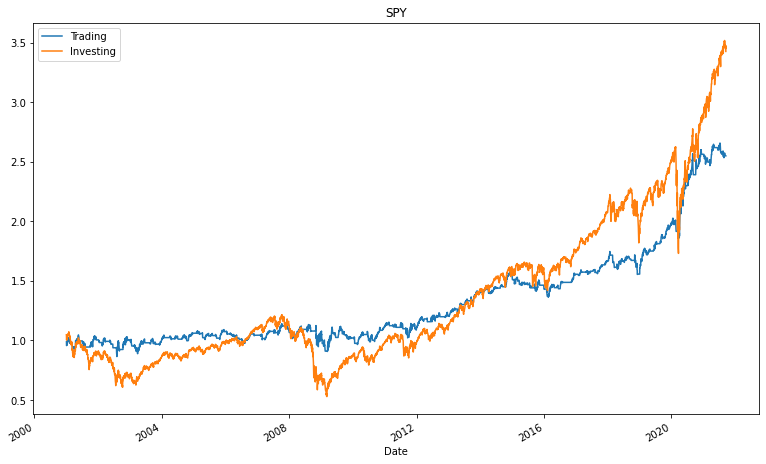

In [5]:
start_year = '2001'
end_year = None
leverage = 1

strat = daily.loc[start_year:end_year,'EMA_Signal'].shift(2) * daily.loc[start_year:,'Close'].pct_change() * leverage
buy_hold = daily.loc[start_year:end_year, 'Close'].pct_change()

plt.title(f'{ticker}')
(strat + 1).cumprod(skipna=True).plot(figsize=(13,8), label='Trading')
(buy_hold + 1).cumprod(skipna=True).plot(label='Investing')

plt.legend()
plt.show()

In [6]:
(strat.mean() / strat.std() * np.sqrt(252)) / (buy_hold.mean() / buy_hold.std() * np.sqrt(252))

1.1200506325900954

## The End